# Assignment 1: Computational Finance

In [281]:
import yfinance as yf
import datetime

ticker = "AAPL"
start_date = "2010-01-01"
end_date = datetime.datetime.now().strftime("%Y-%m-%d")

data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


Historical Estimators

In [282]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


In [283]:
mean_close = data['Close'].mean()
vol = data['Close'].std()
print(mean_close, vol)

Ticker
AAPL    70.48871
dtype: float64 Ticker
AAPL    68.482474
dtype: float64


In [284]:
import numpy as np # for the np.sqrt

In [285]:
T = len(data)
print(T)

3846


The formula is wrong on the Lab Assignment (added T)

In [286]:
def sigma_parkinson_estimator(_high, _low, _open, _close, T):
    return np.sqrt(
        1/(4*np.log(2)*T)*np.sum(np.log(_high/_low)**2)
        )

In [287]:
def sigma_garman_klass_estimator(_high, _low, _open, _close, T):
    return np.sqrt(
        (1/(2*T))*np.sum(np.log(_high/_low)**2) - 
        ((2*np.log(2)-1)/T) * np.sum((np.log(_close/_open))**2)
        )

In [257]:
rollingT = 30
sigma_gk = [
    sigma_garman_klass_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]


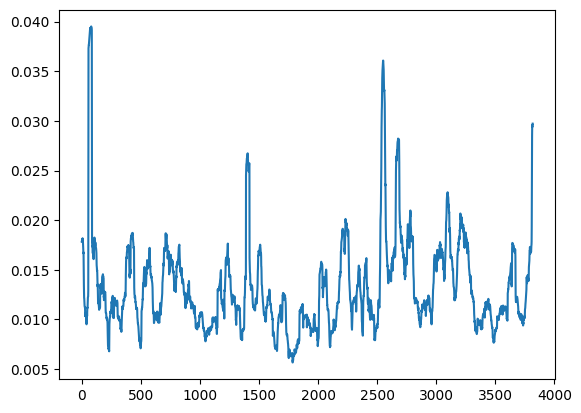

In [258]:
import matplotlib.pyplot as plt

plt.plot(sigma_gk)
plt.show()

In [259]:
sigma_p = [
    sigma_parkinson_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]

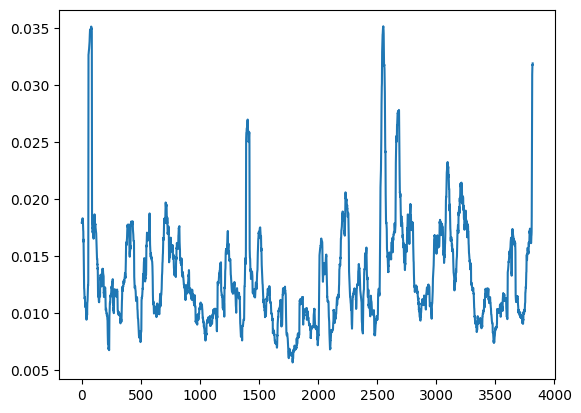

In [260]:
import matplotlib.pyplot as plt

plt.plot(sigma_p)
plt.show()

In [261]:
import pandas as pd
from skfolio.datasets import load_sp500_dataset, load_sp500_implied_vol_dataset
from skfolio.preprocessing import prices_to_returns
prices = load_sp500_dataset()
implied_vol = load_sp500_implied_vol_dataset()
X = prices_to_returns(prices)
X = X.loc["2010":]
implied_vol.tail()

,AAPL,AMD,BAC,BBY,CVX,GE,HD,JNJ,JPM,KO,LLY,MRK,MSFT,PEP,PFE,PG,RRC,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2022-12-21,0.343749,0.512436,0.314423,0.410686,0.301621,0.337233,0.291449,0.169588,0.276606,0.178861,0.287204,0.220556,0.312139,0.186306,0.258662,0.191366,0.557777,0.244674,0.219240,0.306320
2022-12-22,0.357983,0.541554,0.323598,0.418840,0.317364,0.352863,0.304409,0.182946,0.290541,0.188259,0.289049,0.226861,0.327944,0.194996,0.262856,0.196550,0.575974,0.251015,0.226632,0.319773
2022-12-23,0.354818,0.531073,0.316493,0.400008,0.304423,0.348108,0.295155,0.174784,0.283626,0.182933,0.285319,0.218791,0.323790,0.189222,0.256927,0.193781,0.563745,0.246426,0.219599,0.306954
2022-12-27,0.366786,0.545771,0.318301,0.405272,0.307501,0.355508,0.301645,0.180025,0.286293,0.184747,0.295695,0.225937,0.334950,0.190844,0.265863,0.197682,0.570953,0.254200,0.225493,0.311402
2022-12-28,0.388422,0.549840,0.322165,0.429541,0.315993,0.364447,0.308722,0.179856,0.295815,0.192887,0.295466,0.228423,0.340077,0.196283,0.267425,0.208188,0.581149,0.253623,0.236076,0.323964


In [262]:
import yfinance as yf
import datetime
import math 
spx_symbol = "^SPX"
today = "2025-04-18"
end_date = datetime.datetime.strptime(today, "%Y-%m-%d")
start_date = end_date - datetime.timedelta(days=365)

spx_data = yf.download(spx_symbol, start=start_date, end=end_date)
lastBusDay = spx_data.index[-1]
vix_data = yf.download("^VIX", start=lastBusDay, end = lastBusDay + datetime.timedelta(days=1))
S0 = float(spx_data["Close"].iloc[-1]) 
r = 0.02  #fixed
F0 = S0*math.exp(r * T)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\andre\AppData\Local\Temp\ipykernel_33336\4122723492.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(spx_data["Close"].iloc[-1])


b) and c) We compute the estimated VIX and we compare it with the CBOE-quoted VIX

In [263]:
import yfinance as yf
from datetime import datetime, timedelta
import re

def get_dte30(nearest_friday=False):
    FRIDAY = 4
    DTE_30 = 30
    today = datetime.today().date()

    t = today + timedelta(days=DTE_30)
    if nearest_friday:
        inc = 1 if t.weekday() < FRIDAY else -1
        while t.weekday() != FRIDAY:
            t += timedelta(days=inc)
        return t.strftime("%Y-%m-%d")
    
    while t.weekday() > FRIDAY:
        t += timedelta(days=1)

    return t.strftime("%Y-%m-%d")
def set_time_to_expiry_column(option_chain):
    def extract_expiration_from_symbol(contract_symbol):
        match = re.search(r'(\d{6})', contract_symbol)
        if match:
            date_part = match.group(1)
            expiration_date = datetime.strptime(date_part, "%y%m%d").date()
            return expiration_date
    option_chain["expiry"] = option_chain["contractSymbol"].apply(extract_expiration_from_symbol)
    option_chain["expiry"] = pd.to_datetime(option_chain["expiry"])
    option_chain["T"] = (option_chain["expiry"] - pd.Timestamp.today().normalize()).dt.days / 365

def vix_t(option_chain, stock_price, risk_free_rate=0.02):
    """
    Compute the VIX index using CBOE's methodology.
    Parameters:
    - option_chain: DataFrame with 'strike', 'bid', 'ask', 'type' (call/put), 'T' (time to expiration in years)
    - spx_price: Current S&P 500 index price
    - risk_free_rate: Annualized risk-free rate (decimal)
    Returns:
    - VIX index (annualized implied volatility in %)
    """
    # Calculate Forward Price F
    option_chain['mid_price'] = (option_chain['bid'] + option_chain['ask']) / 2

    F = stock_price * np.exp(risk_free_rate* option_chain['T'].iloc[0])


    # Identify Out of the Money Options
    option_chain['OTM'] = ((option_chain['type'] == 'call') & (option_chain['strike'] > F)) | \
                          ((option_chain['type'] == 'put') & (option_chain['strike'] < F))
    otm_options = option_chain[option_chain['OTM']]
    otm_options = otm_options.sort_values(by=['strike'])

    # Compute \(\Delta K_i\) (Strike Intervals)
    otm_options['dK'] = otm_options['strike'].diff().bfill()

    # Compute Weights for Each Option
    otm_options['weight'] = (otm_options['dK'] / otm_options['strike']**2)*np.exp(risk_free_rate * otm_options['T'])


    
    # Compute Variance Swap Estimate
    variance = (2 / otm_options['T'].iloc[0])* (otm_options['weight'] * otm_options['mid_price']).sum()

    # Final Adjustment
    K0 = otm_options.iloc[(otm_options['strike'] - F).abs().argmin()]['strike']
    term_adjustment = ((F / K0) - 1) ** 2 / otm_options['T'].iloc[0]
    variance -= term_adjustment

    # Compute VIX in Annualized Form
    vix = np.sqrt(variance) * 100

    return vix

spx_ticket = yf.Ticker("^SPX")
tau = 30 # according to CBOE
expiry_date = get_dte30()
# For it to be a valid Maturity date T
try:
    spx_ticket.option_chain(date = expiry_date)
except ValueError:
    expiry = get_dte30(nearest_friday=True)



calls = spx_ticket.option_chain(date = expiry_date).calls
calls['type'] = 'call'
puts = spx_ticket.option_chain(date = expiry_date).puts
puts['type'] = 'put'

option_chain = pd.concat([calls,puts])

set_time_to_expiry_column(option_chain)


spx_ticker_candle = spx_ticket.history().iloc[-1]

IV = vix_t(option_chain, spx_ticker_candle.Close)
print(IV)

print(vix_data.Close.to_numpy()[0])

31.30524199522547
[32.63999939]


d) We not plot the historical estimated realized variances from Step 3 along with the VIX time series (from what datetimes though?)

In [264]:
# Now we plot the historical estimated realized variances
rollingT = 30
data = spx_data
rollingT = 30
sigma_gk = [
    sigma_garman_klass_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]


sigma_p = [
    sigma_parkinson_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]
# we download the VIX from the same start and end dates as the SPX data
data_vix = yf.download("^VIX", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


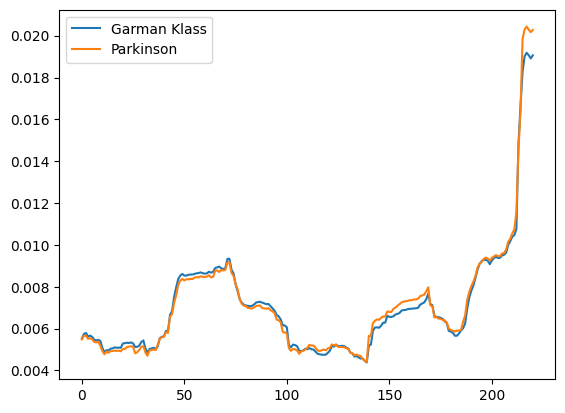

In [265]:

plt.plot(sigma_gk, label='Garman Klass')
plt.plot(sigma_p, label='Parkinson')
plt.legend()
plt.show()

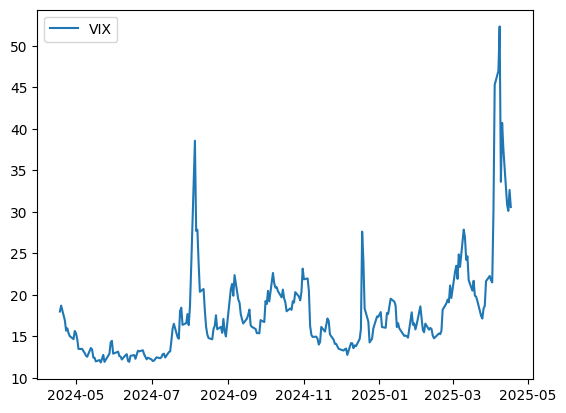

In [266]:
plt.plot(data_vix.Close, label='VIX')
plt.legend()
plt.show()

Now we perform statistical analyses to assess the relationship between the time series

In [267]:
len(sigma_gk), len(sigma_p), len(np.ravel(data_vix.Close)[30:])

(221, 221, 221)

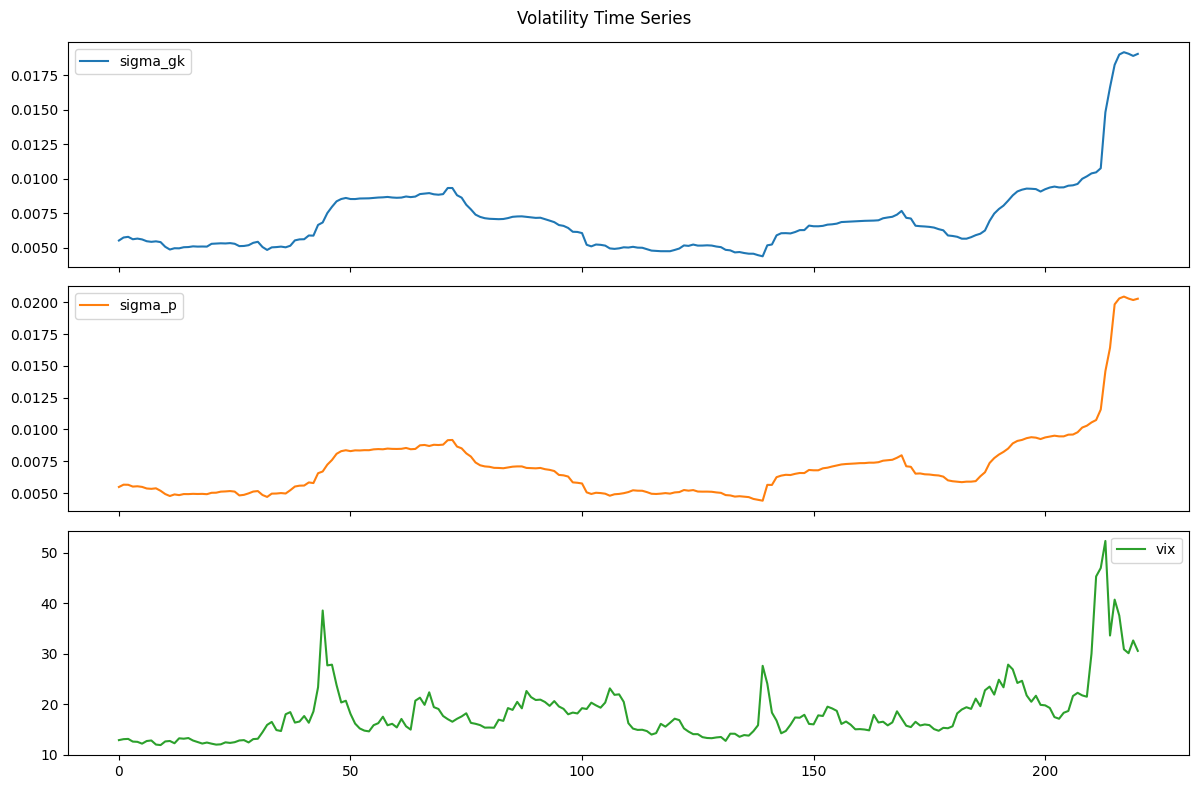

In [268]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, ccf
from statsmodels.api import OLS, add_constant
from scipy.stats import pearsonr, spearmanr
vix_path = np.ravel(data_vix.Close)[30:]
time_series_data = pd.DataFrame({
    'sigma_gk': sigma_gk,
    'sigma_p': sigma_p,
    'vix': vix_path
})
time_series_data.plot(subplots=True, figsize=(12, 8), title="Volatility Time Series")
plt.tight_layout()
plt.show()

In [269]:
print("Pearson Correlation:\n", time_series_data.corr(method='pearson'))
print("\nSpearman Correlation:\n", time_series_data.corr(method='spearman'))


Pearson Correlation:
           sigma_gk   sigma_p       vix
sigma_gk  1.000000  0.995903  0.676301
sigma_p   0.995903  1.000000  0.677934
vix       0.676301  0.677934  1.000000

Spearman Correlation:
           sigma_gk   sigma_p       vix
sigma_gk  1.000000  0.982759  0.572281
sigma_p   0.982759  1.000000  0.580048
vix       0.572281  0.580048  1.000000


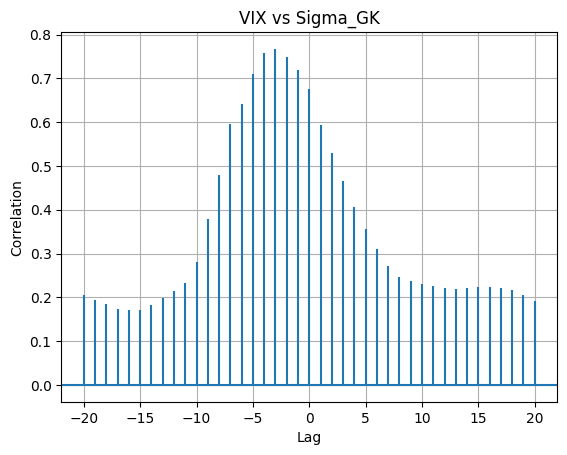

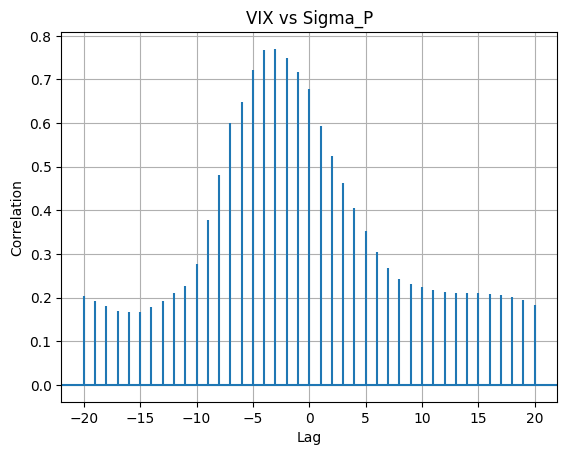

In [270]:
# Cross-correlation between VIX and sigma_gk/p
def plot_ccf(x, y, lags=20, title="Cross-Correlation"):
    plt.xcorr(x - np.mean(x), y - np.mean(y), maxlags=lags)
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.show()

plot_ccf(time_series_data['vix'], time_series_data['sigma_gk'], title='VIX vs Sigma_GK')
plot_ccf(time_series_data['vix'], time_series_data['sigma_p'], title='VIX vs Sigma_P')


In [271]:
# Simple linear regression
X = add_constant(time_series_data[['sigma_gk', 'sigma_p']])
y = time_series_data['vix']
model = OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    vix   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     92.76
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           7.12e-30
Time:                        10:35:48   Log-Likelihood:                -640.03
No. Observations:                 221   AIC:                             1286.
Df Residuals:                     218   BIC:                             1296.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9658      0.943      8.450      0.0

In [272]:
for col in time_series_data.columns:
    result = adfuller(time_series_data[col])
    print(f"\nADF Test for {col}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")



ADF Test for sigma_gk:
ADF Statistic: 0.2718
p-value: 0.9760

ADF Test for sigma_p:
ADF Statistic: 0.8357
p-value: 0.9922

ADF Test for vix:
ADF Statistic: -3.3358
p-value: 0.0134


In [273]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(time_series_data[['vix', 'sigma_gk']], maxlag=5, verbose=True)
grangercausalitytests(time_series_data[['vix', 'sigma_p']], maxlag=5, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3621  , p=0.2445  , df_denom=217, df_num=1
ssr based chi2 test:   chi2=1.3809  , p=0.2399  , df=1
likelihood ratio test: chi2=1.3766  , p=0.2407  , df=1
parameter F test:         F=1.3621  , p=0.2445  , df_denom=217, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.1627  , p=0.0010  , df_denom=214, df_num=2
ssr based chi2 test:   chi2=14.6602 , p=0.0007  , df=2
likelihood ratio test: chi2=14.1903 , p=0.0008  , df=2
parameter F test:         F=7.1627  , p=0.0010  , df_denom=214, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.8949  , p=0.0001  , df_denom=211, df_num=3
ssr based chi2 test:   chi2=24.4704 , p=0.0000  , df=3
likelihood ratio test: chi2=23.1918 , p=0.0000  , df=3
parameter F test:         F=7.8949  , p=0.0001  , df_denom=211, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.5938  , p=0.0001  

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (1.5111905061797895, 0.22028879912504878, 217.0, 1),
   'ssr_chi2test': (1.5320825408274363, 0.21580016139463656, 1),
   'lrtest': (1.5267724592983996, 0.21659748808752424, 1),
   'params_ftest': (1.5111905061797157, 0.22028879912506608, 217.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.309180469472625, 0.10181316057047814, 214.0, 2),
   'ssr_chi2test': (4.726266568359859, 0.09412484080484199, 2),
   'lrtest': (4.675989561614642, 0.09652099005106159, 2),
   'params_ftest': (2.3091804694726292, 0.10181316057047692, 214.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.7169328340627457, 0.16455291441305003, 211.0, 3),
   'ssr_chi2test': (5.3216780733508795, 0.1497019026768122, 3),
   'lrtest': (5.257761459969288, 0.1538667869136725, 3),
   'params_ftest': (1.716932834062735, 0.1645529144130541, 211.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

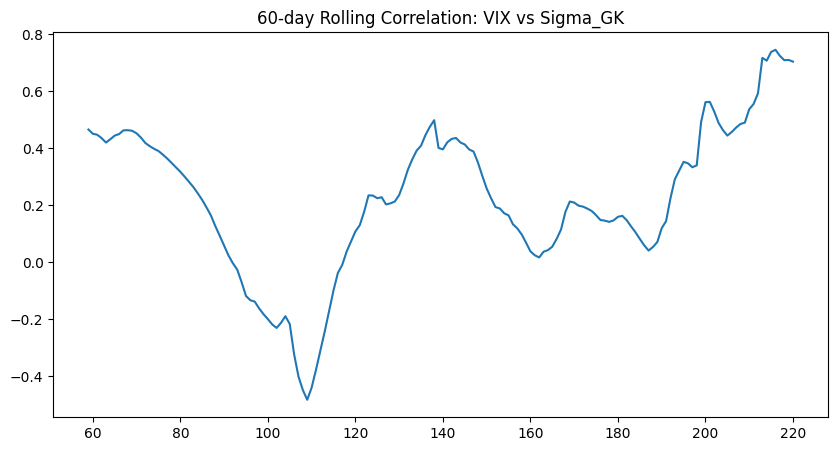

In [274]:
rolling_corr = time_series_data['vix'].rolling(60).corr(time_series_data['sigma_gk'])
rolling_corr.plot(title='60-day Rolling Correlation: VIX vs Sigma_GK', figsize=(10, 5))
plt.show()


In [275]:
spx_data.head()

Price,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX
Date,,,,,
2024-04-18,5011.120117,5056.660156,5001.890137,5031.520020,3619760000
2024-04-19,4967.229980,5019.020020,4953.560059,5005.439941,3878750000
2024-04-22,5010.600098,5038.839844,4969.399902,4987.330078,3820250000
2024-04-23,5070.549805,5076.120117,5027.959961,5028.850098,3751400000
2024-04-24,5071.629883,5089.479980,5047.020020,5084.859863,3656740000


In [276]:
spx_data['returns'] = spx_data['Close'].pct_change().dropna()

# Align everything on date
returns_df = pd.DataFrame({
    'returns': np.ravel(spx_data['returns'][29:]),
    'vix': np.ravel(data_vix['Close'][30:]),
    'sigma_gk': sigma_gk,
    'sigma_p': sigma_p
}).dropna()



In [277]:
len(spx_data['returns'][29:]),len(data_vix['Close'][30:]), len(sigma_gk)

(221, 221, 221)

In [278]:
print(returns_df.shape)
print(returns_df[['returns', 'vix']].dropna().shape)
print(returns_df[['returns', 'vix']].isna().sum())

(221, 4)
(221, 2)
returns    0
vix        0
dtype: int64


In [279]:
from statsmodels.api import OLS, add_constant

X_vix = add_constant(returns_df['vix'])
model_vix = OLS(returns_df['returns'], X_vix).fit()
print(model_vix.summary())


                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     14.30
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           0.000201
Time:                        10:35:48   Log-Likelihood:                 661.90
No. Observations:                 221   AIC:                            -1320.
Df Residuals:                     219   BIC:                            -1313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.003      3.628      0.0

In [280]:
X_sigma = add_constant(returns_df['sigma_gk'])
model_sigma = OLS(returns_df['returns'], X_sigma).fit()
print(model_sigma.summary())


                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1400
Date:                Thu, 17 Apr 2025   Prob (F-statistic):              0.709
Time:                        10:35:48   Log-Likelihood:                 654.98
No. Observations:                 221   AIC:                            -1306.
Df Residuals:                     219   BIC:                            -1299.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.002     -0.315      0.7

We observe statistically significant (p < 0.01) negative relationship between SPX returns and VIX, given that the equation is:

$$ RETURNS = ALPHA + BETA * VIX $$

The fact that $R^2$ is low means that VIX here explains only a small fraction of the return variation, which is expected for daily returns. VIX normally serves as a fear measurement, and tends to rise when the market falls.

In [ ]:
alpha = model_vix.params[0]
beta = model_vix.params[1]
print(f"alpha: {alpha}") # intercept
print(f"beta: {beta}")

alpha: 0.009572634868382654
beta: -0.0005191633059615513


C:\Users\andre\AppData\Local\Temp\ipykernel_33336\3517001434.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model_vix.params[0]
C:\Users\andre\AppData\Local\Temp\ipykernel_33336\3517001434.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model_vix.params[1]


On the other hand, the relationship between SPX returns vs Realized vol is not statistically significant (p > 0.7). The takeaway is that the realized volatility does not explain daily SPX returns meaningfully, and this aligns with the fact that volatility is more of a risk gauge than a return predictor